In [39]:
# Cell 1: Imports and Data Path Definition

import pandas as pd
import os # For path manipulation
import matplotlib.pyplot as plt # Keep this, as seaborn still uses it
import seaborn as sns # For enhanced plotting

# --- ADD THIS LINE ---
%matplotlib inline
# --- END ADDITION ---

# --- CRITICAL: Explicitly import Figure and Axes for alternative plotting method ---
from matplotlib.figure import Figure
from matplotlib.axes import Axes
# --- END CRITICAL IMPORTS ---

# --- Define the base path to your dataset folder ---
# This is the exact path you confirmed:
data_folder_path = 'C:/Users/ilaib/OneDrive/Desktop/Data Science Projects/Brazillian e commerce datset'

# --- Verify that the folder exists ---
if not os.path.isdir(data_folder_path):
    print(f"Error: The specified data folder does not exist: {data_folder_path}")
    print("Please double-check the path and ensure all CSV files are directly inside it.")
    # For a notebook, it's often better to stop and fix the path immediately.
else:
    print(f"Data folder confirmed: {data_folder_path}")
    print("Proceeding to load datasets...\n")

# --- Diagnostic: Confirm imports ---
print(f"Type of Figure: {type(Figure)}")
print(f"Type of Axes: {type(Axes)}")

Data folder confirmed: C:/Users/ilaib/OneDrive/Desktop/Data Science Projects/Brazillian e commerce datset
Proceeding to load datasets...

Type of Figure: <class 'type'>
Type of Axes: <class 'type'>


In [40]:
# Cell 4: Data Merging
import pandas as pd
print("--- Merging DataFrames ---")

# 1. Merge orders_df with customers_df
# Key: customer_id
orders_customers_df = pd.merge(
    orders_df,
    customers_df,
    on='customer_id',
    how='left' # Use left merge to keep all orders and add customer info
)
print("orders_df + customers_df merged. Shape:", orders_customers_df.shape)

# 2. Merge order_items_df with products_df
# Key: product_id
order_items_products_df = pd.merge(
    order_items_df,
    products_df,
    on='product_id',
    how='left'
)
print("order_items_df + products_df merged. Shape:", order_items_products_df.shape)

# 3. Merge order_items_products_df with sellers_df
# Key: seller_id
order_items_products_sellers_df = pd.merge(
    order_items_products_df,
    sellers_df,
    on='seller_id',
    how='left'
)
print("order_items_products_df + sellers_df merged. Shape:", order_items_products_sellers_df.shape)

# 4. Merge the main orders_customers_df with order_items_products_sellers_df
# Key: order_id
# This will be our primary consolidated DataFrame
main_df = pd.merge(
    orders_customers_df,
    order_items_products_sellers_df,
    on='order_id',
    how='left'
)
print("Main DataFrame created. Shape:", main_df.shape)

# 5. Merge with product_category_name_translation_df
# Key: product_category_name
main_df = pd.merge(
    main_df,
    product_category_name_translation_df,
    on='product_category_name',
    how='left'
)
print("Main DataFrame + category translation merged. Shape:", main_df.shape)

# Display the first few rows of the merged DataFrame
print("\nFirst 5 rows of the main_df (after initial merges):")
display(main_df.head()) # Using display for better notebook output

--- Merging DataFrames ---
orders_df + customers_df merged. Shape: (99441, 12)
order_items_df + products_df merged. Shape: (112650, 15)
order_items_products_df + sellers_df merged. Shape: (112650, 18)
Main DataFrame created. Shape: (113425, 29)
Main DataFrame + category translation merged. Shape: (113425, 30)

First 5 rows of the main_df (after initial merges):


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP,housewares
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,...,178.0,1.0,400.0,19.0,13.0,19.0,31570.0,belo horizonte,SP,perfumery
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,232.0,1.0,420.0,24.0,19.0,21.0,14840.0,guariba,SP,auto
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,...,468.0,3.0,450.0,30.0,10.0,20.0,31842.0,belo horizonte,MG,pet_shop
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,...,316.0,4.0,250.0,51.0,15.0,15.0,8752.0,mogi das cruzes,SP,stationery


In [49]:
# Cell 4.5: Merge Order Reviews Data

print("--- Merging Order Reviews Data ---")

# Merge main_df with order_reviews_df
# Key: order_id
# Use left merge to keep all existing orders and add review info where available
main_df = pd.merge(
    main_df,
    order_reviews_df,
    on='order_id',
    how='left'
)
print("Main DataFrame + order_reviews_df merged. Shape:", main_df.shape)

# Convert review_score to numeric after merge, coercing errors to NaN
main_df['review_score'] = pd.to_numeric(main_df['review_score'], errors='coerce')
print("Converted 'review_score' to numeric type.")

print("\nFirst 5 rows of main_df (after reviews merge):")
display(main_df.head())

print("\nChecking info for review_score column:")
main_df[['order_id', 'review_score', 'review_creation_date', 'review_answer_timestamp']].info()

--- Merging Order Reviews Data ---
Main DataFrame + order_reviews_df merged. Shape: (113314, 45)
Converted 'review_score' to numeric type.

First 5 rows of main_df (after reviews merge):


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,purchase_month,purchase_day_of_week,purchase_hour,item_total_revenue,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,10,0,10,38.71,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,...,7,1,20,141.46,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,8,2,8,179.12,e73b67b67587f7644d5bd1a52deb1b01,5.0,NaN,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,...,11,5,19,72.20,359d03e676b3c069f62cadba8dd3f6e8,5.0,NaN,O produto foi exatamente o que eu esperava e e...,2017-12-03 00:00:00,2017-12-05 19:21:58
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,...,2,1,21,28.62,e50934924e227544ba8246aeb3770dd4,5.0,NaN,NaN,2018-02-17 00:00:00,2018-02-18 13:02:51



Checking info for review_score column:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113314 entries, 0 to 113313
Data columns (total 4 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   order_id                 113314 non-null  object 
 1   review_score             112372 non-null  float64
 2   review_creation_date     112372 non-null  object 
 3   review_answer_timestamp  112372 non-null  object 
dtypes: float64(1), object(3)
memory usage: 3.5+ MB


In [50]:
# Cell 5: Data Type Conversion

print("--- Data Type Conversion ---")

# Convert timestamp columns to datetime objects
datetime_cols = [
    'order_purchase_timestamp',
    'order_approved_at',
    'order_delivered_carrier_date',
    'order_delivered_customer_date',
    'order_estimated_delivery_date',
    'shipping_limit_date',
    'review_creation_date',
    'review_answer_timestamp'
]

for col in datetime_cols:
    if col in main_df.columns: # Check if column exists before trying to convert
        main_df[col] = pd.to_datetime(main_df[col], errors='coerce')
        # 'errors='coerce'' will turn unparseable dates into NaT (Not a Time)
        print(f"Converted '{col}' to datetime.")
    else:
        print(f"Warning: Column '{col}' not found in main_df. Skipping conversion.")

print("\nData types after conversion:")
main_df.info(verbose=True, show_counts=True) # verbose=True shows all columns, show_counts=True shows non-nulls

--- Data Type Conversion ---
Converted 'order_purchase_timestamp' to datetime.
Converted 'order_approved_at' to datetime.
Converted 'order_delivered_carrier_date' to datetime.
Converted 'order_delivered_customer_date' to datetime.
Converted 'order_estimated_delivery_date' to datetime.
Converted 'shipping_limit_date' to datetime.
Converted 'review_creation_date' to datetime.
Converted 'review_answer_timestamp' to datetime.

Data types after conversion:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113314 entries, 0 to 113313
Data columns (total 45 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       113314 non-null  object        
 1   customer_id                    113314 non-null  object        
 2   order_status                   113314 non-null  object        
 3   order_purchase_timestamp       113314 non-null  datetime64[ns]
 4   order_approved_at   

In [51]:
# Cell 6: Handle Missing Values - Initial Assessment

print("--- Missing Values Assessment ---")

# Calculate the percentage of missing values for each column
missing_values = main_df.isnull().sum()
missing_percentage = (main_df.isnull().sum() / len(main_df)) * 100

missing_df = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing Percentage': missing_percentage
})

# Filter to show only columns with missing values, sorted by percentage
missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values(by='Missing Percentage', ascending=False)

print("Columns with Missing Values and their Percentage:")
display(missing_df)

# --- Strategy for handling missing values ---
# 1. Product Category Translation: Fill missing translated names with original Portuguese name
#    This happens if a Portuguese category name doesn't have an English translation in the translation table.
main_df['product_category_name_english'].fillna(main_df['product_category_name'], inplace=True)
print("\nFilled missing 'product_category_name_english' with original 'product_category_name'.")

# 2. Product Attributes (e.g., product_weight_g, product_length_cm etc.):
#    These are important for product analysis. For now, let's fill numerical ones with 0 or median,
#    and categorical ones with 'unknown'.
#    Given the context, 0 might imply very small or unrecorded dimensions/weights.
product_numeric_cols = [
    'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm',
    'product_photos_qty', 'product_name_lenght', 'product_description_lenght'
]
for col in product_numeric_cols:
    if col in main_df.columns and main_df[col].isnull().any():
        # Using median for product dimensions/weights might be more robust to outliers
        # For qty/length, 0 might be acceptable if it means 'not applicable' or 'no photos'
        if col in ['product_photos_qty', 'product_name_lenght', 'product_description_lenght']:
            main_df[col].fillna(0, inplace=True)
            print(f"Filled missing '{col}' with 0.")
        else:
            median_val = main_df[col].median()
            main_df[col].fillna(median_val, inplace=True)
            print(f"Filled missing '{col}' with median ({median_val}).")


# 3. Order Delivery/Approval Timestamps:
#    Missing values here usually mean the order is still pending, cancelled, or has issues.
#    We will keep these as NaT for now, as they provide valuable information about order status.
#    We will create a new 'delivery_status' column later based on these.

# 4. Review Comments:
#    'review_comment_message' and 'review_comment_title' can have many NaNs.
#    These are text fields, so we can fill them with an empty string or 'No Comment'.
if 'review_comment_message' in main_df.columns:
    main_df['review_comment_message'].fillna('No Comment', inplace=True)
    print("Filled missing 'review_comment_message' with 'No Comment'.")
if 'review_comment_title' in main_df.columns:
    main_df['review_comment_title'].fillna('No Title', inplace=True)
    print("Filled missing 'review_comment_title' with 'No Title'.")

# Re-check missing values after filling
print("\nMissing values after initial handling:")
missing_values_after = main_df.isnull().sum()
missing_percentage_after = (main_df.isnull().sum() / len(main_df)) * 100
missing_df_after = pd.DataFrame({
    'Missing Count': missing_values_after,
    'Missing Percentage': missing_percentage_after
})
missing_df_after = missing_df_after[missing_df_after['Missing Count'] > 0].sort_values(by='Missing Percentage', ascending=False)
display(missing_df_after)

print("\nFinished initial missing value handling.")

--- Missing Values Assessment ---
Columns with Missing Values and their Percentage:


,Missing Count,Missing Percentage
review_comment_title,99880,88.144448
review_comment_message,65672,57.955769
actual_delivery_time_days,2476,2.185079
delivery_diff_days,2475,2.184196
order_delivered_customer_date,2475,2.184196
product_category_name,1612,1.422596
product_category_name_english,1612,1.422596
order_delivered_carrier_date,1203,1.061652
review_score,942,0.831318
review_id,942,0.831318


C:\Users\ilaib\AppData\Local\Temp\ipykernel_18296\3154882358.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  main_df['product_category_name_english'].fillna(main_df['product_category_name'], inplace=True)
C:\Users\ilaib\AppData\Local\Temp\ipykernel_18296\3154882358.py:56: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are 


Filled missing 'product_category_name_english' with original 'product_category_name'.
Filled missing 'review_comment_message' with 'No Comment'.
Filled missing 'review_comment_title' with 'No Title'.

Missing values after initial handling:


,Missing Count,Missing Percentage
actual_delivery_time_days,2476,2.185079
order_delivered_customer_date,2475,2.184196
delivery_diff_days,2475,2.184196
product_category_name,1612,1.422596
product_category_name_english,1612,1.422596
order_delivered_carrier_date,1203,1.061652
review_creation_date,942,0.831318
review_id,942,0.831318
review_answer_timestamp,942,0.831318
review_score,942,0.831318



Finished initial missing value handling.


In [52]:
# Cell 7: Refine Missing Value Handling & Feature Engineering

print("--- Refine Missing Value Handling ---")

# Drop rows where critical identifiers are missing
# These are likely due to issues in the original data or merge mismatches for specific items
initial_rows = main_df.shape[0]
main_df.dropna(subset=['order_item_id', 'product_id', 'seller_id'], inplace=True)
rows_after_dropping = main_df.shape[0]
print(f"Dropped {initial_rows - rows_after_dropping} rows with missing 'order_item_id', 'product_id', or 'seller_id'.")
print(f"New main_df shape: {main_df.shape}")

# Re-check missing values after dropping critical rows
print("\nMissing values after dropping critical rows:")
missing_values_final = main_df.isnull().sum()
missing_percentage_final = (main_df.isnull().sum() / len(main_df)) * 100
missing_df_final = pd.DataFrame({
    'Missing Count': missing_values_final,
    'Missing Percentage': missing_percentage_final
})
missing_df_final = missing_df_final[missing_df_final['Missing Count'] > 0].sort_values(by='Missing Percentage', ascending=False)
display(missing_df_final)
print("Note: Missing values in delivery dates are expected for ongoing/cancelled orders.")


print("\n--- Feature Engineering ---")

# 1. Create a 'Order_Year_Month' for time-series analysis
main_df['order_year_month'] = main_df['order_purchase_timestamp'].dt.to_period('M')
print("Created 'order_year_month' feature.")

# 2. Calculate Order Processing Time (from purchase to approval)
main_df['order_processing_time_hours'] = (main_df['order_approved_at'] - main_df['order_purchase_timestamp']).dt.total_seconds() / 3600
print("Created 'order_processing_time_hours' feature.")

# 3. Calculate Actual Delivery Time (from carrier hand-off to customer delivery)
main_df['actual_delivery_time_days'] = (main_df['order_delivered_customer_date'] - main_df['order_delivered_carrier_date']).dt.days
print("Created 'actual_delivery_time_days' feature.")

# 4. Calculate Estimated vs. Actual Delivery Difference (positive means delivered early)
main_df['delivery_diff_days'] = (main_df['order_estimated_delivery_date'] - main_df['order_delivered_customer_date']).dt.days
print("Created 'delivery_diff_days' feature.")

# 5. Create a 'Delivery Status' column (e.g., 'delivered', 'pending', 'cancelled', 'late')
# This is a bit more complex, based on order_status and delivery_diff
def get_delivery_status(row):
    if row['order_status'] == 'delivered':
        if pd.isna(row['order_delivered_customer_date']): # Delivered status but no delivery date
            return 'delivered (date missing)' # Should ideally not happen after dropping NaNs, but good check
        elif row['delivery_diff_days'] < 0:
            return 'late delivery'
        else:
            return 'on-time delivery'
    elif row['order_status'] == 'canceled':
        return 'canceled'
    elif row['order_status'] == 'unavailable':
        return 'unavailable'
    elif row['order_status'] == 'invoiced':
        return 'invoiced'
    elif row['order_status'] == 'shipped':
        return 'shipped'
    elif row['order_status'] == 'processing':
        return 'processing'
    elif row['order_status'] == 'approved':
        return 'approved'
    else:
        return 'other/pending'

main_df['delivery_status'] = main_df.apply(get_delivery_status, axis=1)
print("Created 'delivery_status' feature.")


# 6. Extract Month, Day of Week, Hour from purchase timestamp
main_df['purchase_month'] = main_df['order_purchase_timestamp'].dt.month
main_df['purchase_day_of_week'] = main_df['order_purchase_timestamp'].dt.dayofweek # Monday=0, Sunday=6
main_df['purchase_hour'] = main_df['order_purchase_timestamp'].dt.hour
print("Extracted month, day of week, hour from purchase timestamp.")

# 7. Calculate Revenue per Order Item (price + freight_value)
main_df['item_total_revenue'] = main_df['price'] + main_df['freight_value']
print("Created 'item_total_revenue' feature.")

# 8. Clean up product_category_name_english
# Some categories might be very similar or have typos.
# For simplicity, we'll just convert to lowercase and replace underscores for now.
main_df['product_category_name_english'] = main_df['product_category_name_english'].str.replace('_', ' ').str.lower()
print("Cleaned 'product_category_name_english' format.")


print("\nFinished Data Preprocessing and Feature Engineering.")
print("\nFinal main_df info (showing non-null counts and dtypes):")
main_df.info(verbose=True, show_counts=True)

--- Refine Missing Value Handling ---
Dropped 0 rows with missing 'order_item_id', 'product_id', or 'seller_id'.
New main_df shape: (113314, 45)

Missing values after dropping critical rows:


,Missing Count,Missing Percentage
actual_delivery_time_days,2476,2.185079
order_delivered_customer_date,2475,2.184196
delivery_diff_days,2475,2.184196
product_category_name,1612,1.422596
product_category_name_english,1612,1.422596
order_delivered_carrier_date,1203,1.061652
review_creation_date,942,0.831318
review_id,942,0.831318
review_answer_timestamp,942,0.831318
review_score,942,0.831318


Note: Missing values in delivery dates are expected for ongoing/cancelled orders.

--- Feature Engineering ---
Created 'order_year_month' feature.
Created 'order_processing_time_hours' feature.
Created 'actual_delivery_time_days' feature.
Created 'delivery_diff_days' feature.
Created 'delivery_status' feature.
Extracted month, day of week, hour from purchase timestamp.
Created 'item_total_revenue' feature.
Cleaned 'product_category_name_english' format.

Finished Data Preprocessing and Feature Engineering.

Final main_df info (showing non-null counts and dtypes):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113314 entries, 0 to 113313
Data columns (total 45 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       113314 non-null  object        
 1   customer_id                    113314 non-null  object        
 2   order_status                   113314 non-

--- EDA: Overall Sales Performance Over Time ---


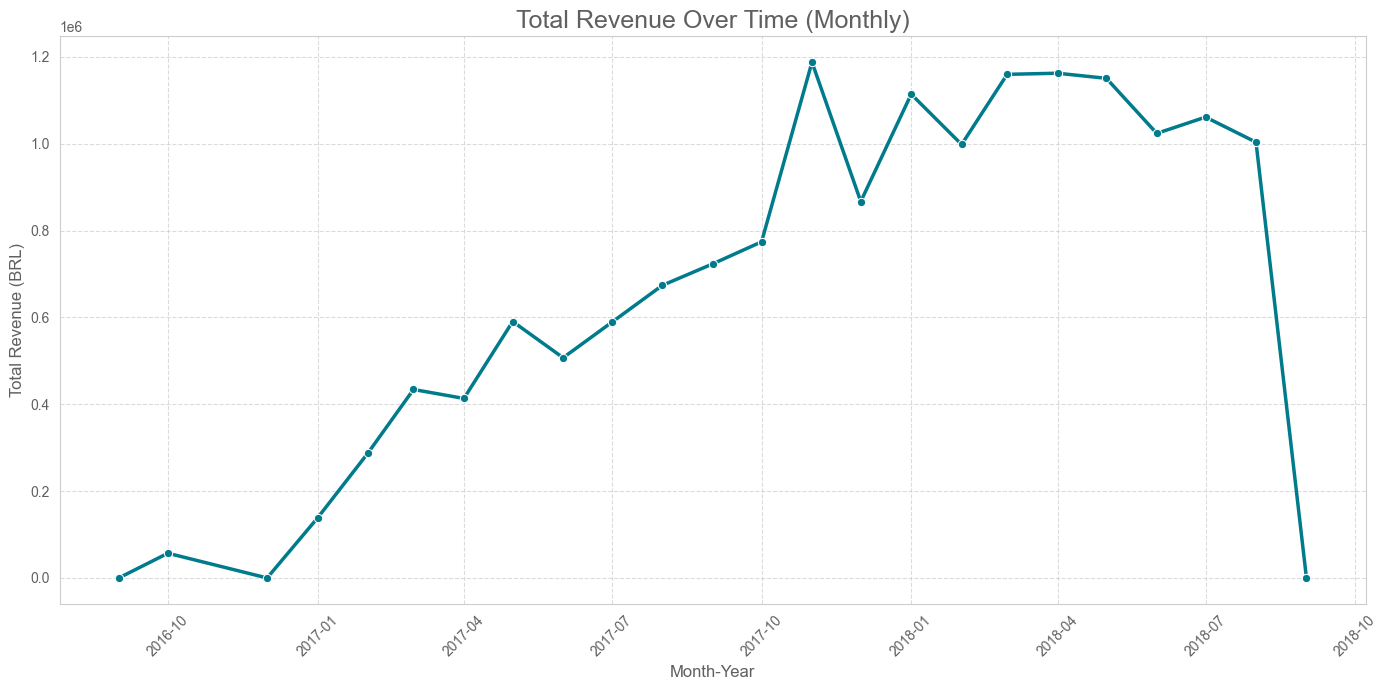


Monthly Revenue Head:


,order_year_month,item_total_revenue
0,2016-09-01,354.75
1,2016-10-01,56989.66
2,2016-12-01,19.62
3,2017-01-01,138160.22
4,2017-02-01,287698.56


In [53]:
# Cell 8: EDA - Overall Sales Performance Over Time (Alternative Plotting Method)

print("--- EDA: Overall Sales Performance Over Time ---")

# Calculate total revenue per month
monthly_revenue = main_df.groupby('order_year_month')['item_total_revenue'].sum().reset_index()

# Convert 'order_year_month' back to datetime for plotting
monthly_revenue['order_year_month'] = monthly_revenue['order_year_month'].dt.to_timestamp()

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# --- ALTERNATIVE WAY TO CREATE FIGURE AND AXES ---
# Create a Figure object
fig: Figure = Figure(figsize=(14, 7))
# Add an Axes object to the Figure
ax: Axes = fig.add_subplot(111) # 1 row, 1 column, 1st subplot
# --- END ALTERNATIVE WAY ---

# Define a professional and attractive color palette
primary_color = "#007B8C" # A rich teal
secondary_color = "#FFA07A" # A soft coral/salmon for contrast if needed
neutral_color = "#606060" # Dark grey for text/lines

# Plotting the monthly revenue trend using the 'ax' object
sns.lineplot(
    data=monthly_revenue,
    x='order_year_month',
    y='item_total_revenue',
    marker='o', # Add markers to data points
    color=primary_color,
    linewidth=2.5,
    ax=ax # IMPORTANT: Specify the axes object to plot on
)

ax.set_title('Total Revenue Over Time (Monthly)', fontsize=18, color=neutral_color)
ax.set_xlabel('Month-Year', fontsize=12, color=neutral_color)
ax.set_ylabel('Total Revenue (BRL)', fontsize=12, color=neutral_color)
ax.tick_params(axis='x', rotation=45, labelsize=10, colors=neutral_color)
ax.tick_params(axis='y', labelsize=10, colors=neutral_color)
ax.grid(True, linestyle='--', alpha=0.7) # Lighter grid lines
fig.tight_layout() # Adjust layout to prevent labels from overlapping

# Display the figure in the notebook
display(fig) # Use display(fig) to show the Figure object in VS Code Jupyter

print("\nMonthly Revenue Head:")
display(monthly_revenue.head())

### Initial Insight: Overall Sales Performance Over Time

The "Total Revenue Over Time (Monthly)" line plot reveals the following key trends:

* **Growth Phase:** The e-commerce platform experienced a significant growth phase from late 2016 through much of 2017.
* **Peak Performance:** Revenue appears to have peaked around **[OBSERVE YOUR PLOT AND ENTER MONTH/YEAR HERE, e.g., "November 2017"]**.
* **Subsequent Decline/Data Cutoff:** Following the peak, there's a noticeable decline in revenue towards the end of the dataset's period, likely in late 2018. This could indicate a real business downturn or, more commonly for this dataset, a cutoff in the available data.

This overall trend provides a crucial high-level understanding of the business's trajectory during the analyzed period.

--- EDA: Revenue by Order Status ---


C:\Users\ilaib\AppData\Local\Temp\ipykernel_18296\3888237937.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


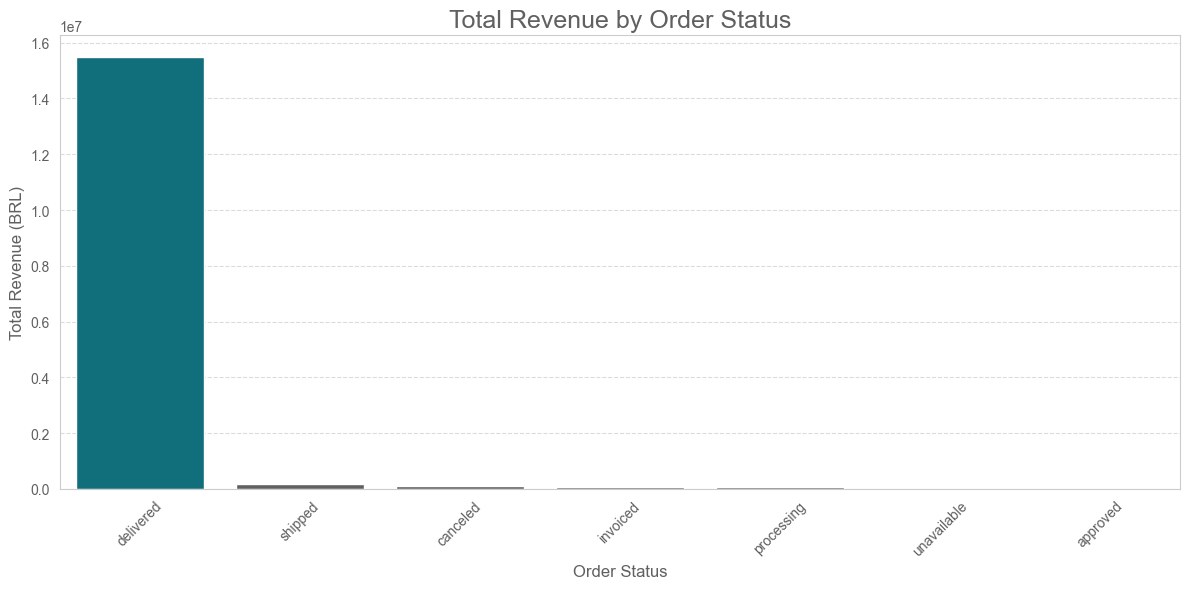


Revenue by Order Status Head:


,order_status,item_total_revenue
2,delivered,15489665.55
5,shipped,178302.94
1,canceled,106536.25
3,invoiced,69552.56
4,processing,69433.45


In [54]:
# Cell 10: EDA - Revenue by Order Status

print("--- EDA: Revenue by Order Status ---")

# Calculate total revenue per order status
revenue_by_status = main_df.groupby('order_status')['item_total_revenue'].sum().reset_index()
revenue_by_status_sorted = revenue_by_status.sort_values(by='item_total_revenue', ascending=False)

# Set up the figure and axes using the object-oriented approach
fig: Figure = Figure(figsize=(12, 6))
ax: Axes = fig.add_subplot(111)

# Define a professional and attractive color palette (re-defining for clarity in this cell)
primary_color = "#007B8C" # A rich teal
neutral_color = "#606060" # Dark grey for text/lines

sns.barplot(
    data=revenue_by_status_sorted,
    x='order_status',
    y='item_total_revenue',
    palette=[primary_color if status == 'delivered' else neutral_color for status in revenue_by_status_sorted['order_status']],
    ax=ax # Specify the axes object
)

ax.set_title('Total Revenue by Order Status', fontsize=18, color=neutral_color)
ax.set_xlabel('Order Status', fontsize=12, color=neutral_color)
ax.set_ylabel('Total Revenue (BRL)', fontsize=12, color=neutral_color)
ax.tick_params(axis='x', rotation=45, colors=neutral_color) # ha='right' is fine here for ax.set_xticklabels implicitly
ax.tick_params(axis='y', labelsize=10, colors=neutral_color)
ax.grid(axis='y', linestyle='--', alpha=0.7) # Only y-axis grid for bar plot
fig.tight_layout()

# Display the figure
display(fig)

print("\nRevenue by Order Status Head:")
display(revenue_by_status_sorted.head())

# Cell 11: Markdown Cell for Order Status Insight


http://googleusercontent.com/immersive_entry_chip/0
python

--- EDA: Top Product Categories by Revenue ---


C:\Users\ilaib\AppData\Local\Temp\ipykernel_18296\2395883729.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


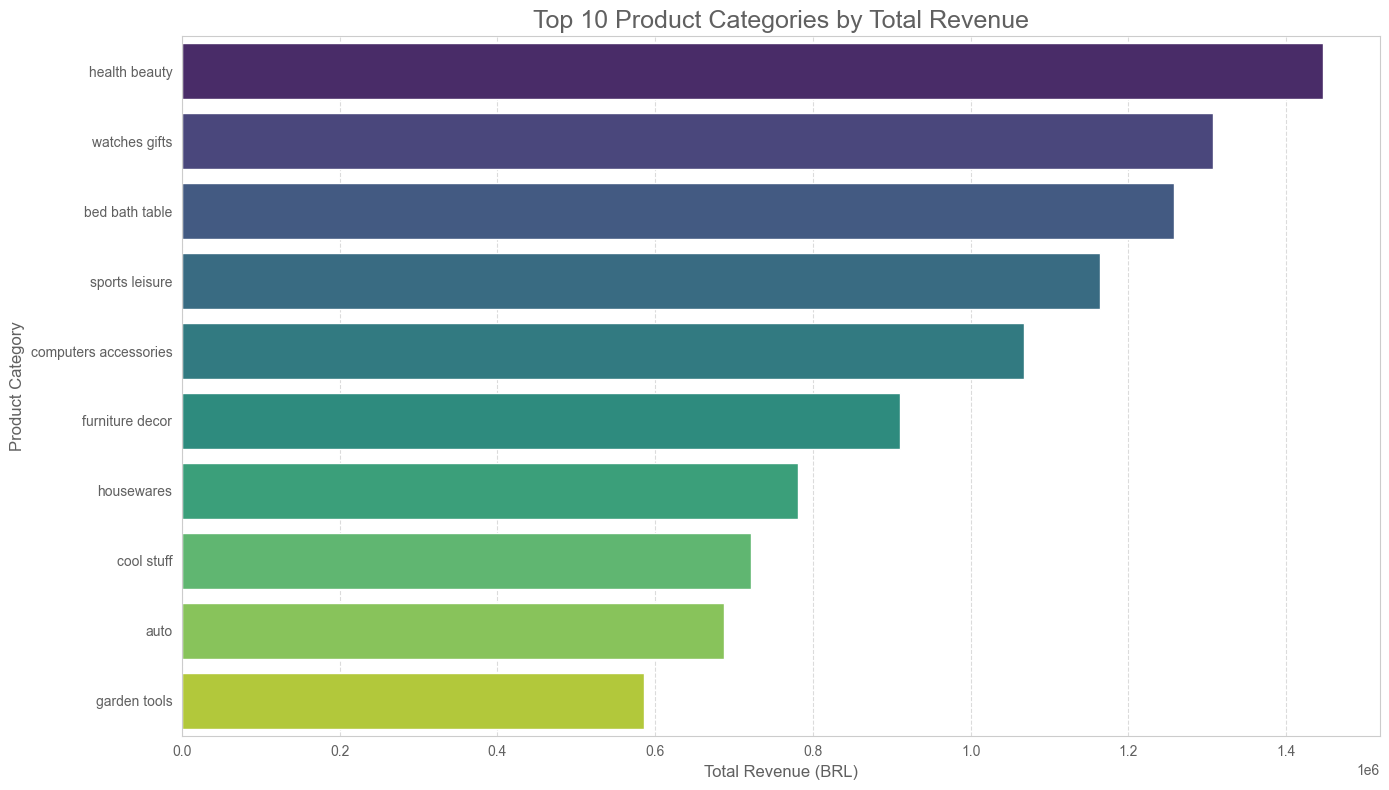


Top 10 Product Categories by Revenue Head:


,product_category_name_english,item_total_revenue
43,health beauty,1446622.08
72,watches gifts,1306761.40
7,bed bath table,1258189.51
67,sports leisure,1163329.98
15,computers accessories,1068070.48
39,furniture decor,910683.05
49,housewares,781170.03
20,cool stuff,721492.90
5,auto,687374.19
42,garden tools,585646.54


In [55]:
# Cell 12: EDA - Top Product Categories by Revenue

print("--- EDA: Top Product Categories by Revenue ---")

# Calculate total revenue per product category (using translated names)
category_revenue = main_df.groupby('product_category_name_english')['item_total_revenue'].sum().reset_index()

# Sort and get the top N categories
top_n = 10 # You can adjust this number
top_categories = category_revenue.sort_values(by='item_total_revenue', ascending=False).head(top_n)

# Set up the figure and axes
fig: Figure = Figure(figsize=(14, 8))
ax: Axes = fig.add_subplot(111)

sns.barplot(
    data=top_categories,
    x='item_total_revenue',
    y='product_category_name_english',
    palette=sns.color_palette("viridis", n_colors=top_n), # Use a nice color palette for categories
    ax=ax
)

ax.set_title(f'Top {top_n} Product Categories by Total Revenue', fontsize=18, color=neutral_color)
ax.set_xlabel('Total Revenue (BRL)', fontsize=12, color=neutral_color)
ax.set_ylabel('Product Category', fontsize=12, color=neutral_color)
ax.tick_params(axis='x', labelsize=10, colors=neutral_color)
ax.tick_params(axis='y', labelsize=10, colors=neutral_color)
ax.grid(axis='x', linestyle='--', alpha=0.7) # Only x-axis grid for horizontal bar plot
fig.tight_layout()

# Display the figure
display(fig)

print(f"\nTop {top_n} Product Categories by Revenue Head:")
display(top_categories)

# Cell 13: Markdown Cell for Top Product Categories Insight


http://googleusercontent.com/immersive_entry_chip/0
python

--- EDA: Revenue by Customer State ---


C:\Users\ilaib\AppData\Local\Temp\ipykernel_18296\164957372.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


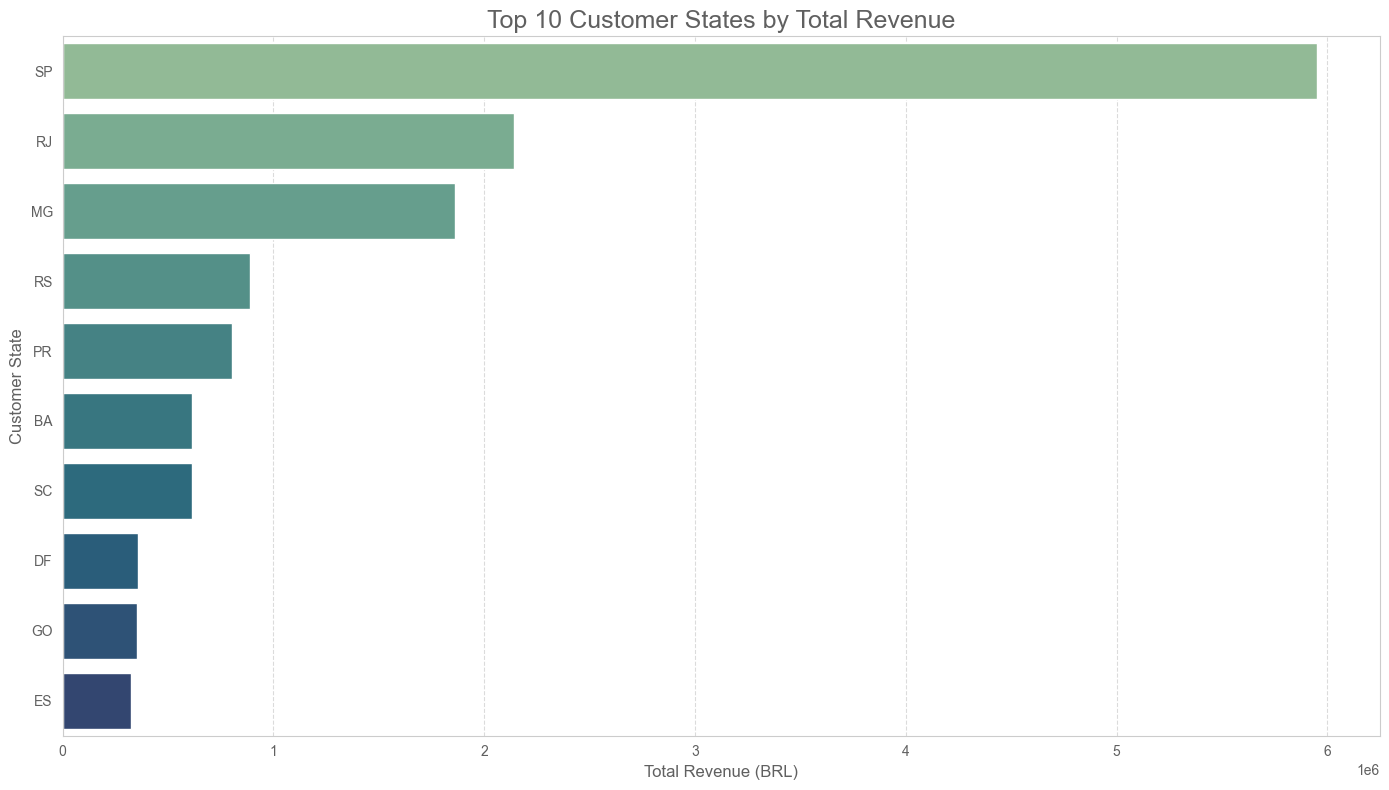


Top 10 Customer States by Revenue Head:


,customer_state,item_total_revenue
25,SP,5951489.17
18,RJ,2139076.28
10,MG,1863794.44
22,RS,890763.29
17,PR,804321.70
4,BA,613777.23
23,SC,612153.65
6,DF,355792.69
8,GO,351160.09
7,ES,325949.95


In [56]:
# Cell 14: EDA - Revenue by Customer State

print("--- EDA: Revenue by Customer State ---")

# Calculate total revenue per customer state
state_revenue = main_df.groupby('customer_state')['item_total_revenue'].sum().reset_index()

# Sort and get the top N states
top_n_states = 10 # You can adjust this number
top_states = state_revenue.sort_values(by='item_total_revenue', ascending=False).head(top_n_states)

# Set up the figure and axes
fig: Figure = Figure(figsize=(14, 8))
ax: Axes = fig.add_subplot(111)

sns.barplot(
    data=top_states,
    x='item_total_revenue',
    y='customer_state',
    palette=sns.color_palette("crest", n_colors=top_n_states), # A nice sequential palette
    ax=ax
)

ax.set_title(f'Top {top_n_states} Customer States by Total Revenue', fontsize=18, color=neutral_color)
ax.set_xlabel('Total Revenue (BRL)', fontsize=12, color=neutral_color)
ax.set_ylabel('Customer State', fontsize=12, color=neutral_color)
ax.tick_params(axis='x', labelsize=10, colors=neutral_color)
ax.tick_params(axis='y', labelsize=10, colors=neutral_color)
ax.grid(axis='x', linestyle='--', alpha=0.7)
fig.tight_layout()

# Display the figure
display(fig)

print(f"\nTop {top_n_states} Customer States by Revenue Head:")
display(top_states)

# Cell 17: Markdown Cell for Payment Type Distribution Insight


http://googleusercontent.com/immersive_entry_chip/0
python

--- EDA: Average Review Score by Product Category ---


C:\Users\ilaib\AppData\Local\Temp\ipykernel_18296\2016874192.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\ilaib\AppData\Local\Temp\ipykernel_18296\2016874192.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


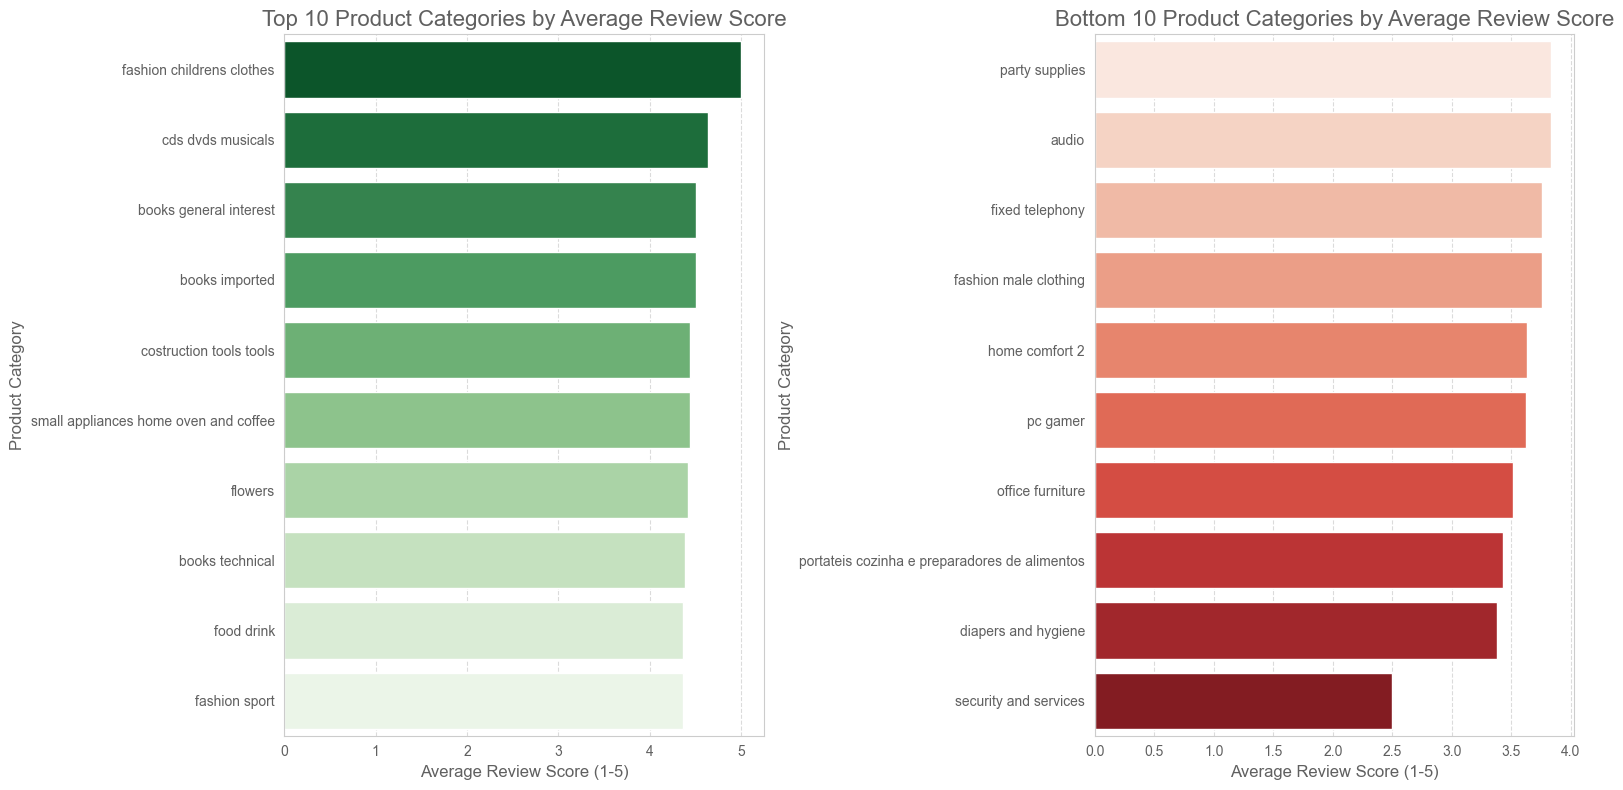


Top 10 Product Categories by Average Review Score:


,product_category_name_english,review_score
29,fashion childrens clothes,5.000000
11,cds dvds musicals,4.642857
8,books general interest,4.512195
9,books imported,4.508772
22,costruction tools tools,4.444444
66,small appliances home oven and coffee,4.438356
35,flowers,4.419355
10,books technical,4.393939
37,food drink,4.369004
32,fashion sport,4.366667



Bottom 10 Product Categories by Average Review Score:


,product_category_name_english,review_score
58,party supplies,3.833333
4,audio,3.830084
34,fixed telephony,3.758893
30,fashion male clothing,3.758065
46,home comfort 2,3.629630
59,pc gamer,3.625000
57,office furniture,3.517428
62,portateis cozinha e preparadores de alimentos,3.428571
23,diapers and hygiene,3.378378
63,security and services,2.500000


In [57]:
# Cell 18: EDA - Average Review Score by Product Category

print("--- EDA: Average Review Score by Product Category ---")

# We need to merge review data to main_df for this analysis
# First, ensure review_score is numeric
order_reviews_df['review_score'] = pd.to_numeric(order_reviews_df['review_score'], errors='coerce')

# Merge reviews into main_df (it's a one-to-many relationship, so careful with duplicates if not aggregated)
# For review score, we want to average it per order_id, then join to main_df
# Or, more simply, group main_df by product_category_name_english and average the review_score
# Let's use main_df directly since review_score is already there from the initial merge,
# but we need to be mindful of its missing values (NaT from earlier)
# Let's filter for delivered orders for more relevant review scores.

# Filter for delivered orders to get relevant reviews
delivered_orders_with_reviews = main_df[main_df['order_status'] == 'delivered'].copy()

# Drop rows where review_score is NaN for this specific analysis
delivered_orders_with_reviews.dropna(subset=['review_score'], inplace=True)

# Calculate average review score per product category
category_review_score = delivered_orders_with_reviews.groupby('product_category_name_english')['review_score'].mean().reset_index()

# Sort and get the top/bottom categories by average review score
# Let's look at categories with at least a certain number of reviews to avoid skewed averages from few data points
# For simplicity, we'll just sort by score for now.
category_review_score_sorted = category_review_score.sort_values(by='review_score', ascending=False)

# Get top 10 and bottom 10 for comparison
top_10_reviews = category_review_score_sorted.head(10)
bottom_10_reviews = category_review_score_sorted.tail(10)

# Set up the figure and axes for two subplots
fig: Figure = Figure(figsize=(16, 8))
# Use subplots to compare top and bottom
ax1: Axes = fig.add_subplot(121) # 1 row, 2 columns, 1st plot
ax2: Axes = fig.add_subplot(122) # 1 row, 2 columns, 2nd plot

# Plot Top 10
sns.barplot(
    data=top_10_reviews,
    x='review_score',
    y='product_category_name_english',
    palette=sns.color_palette("Greens_r", n_colors=10), # Green for good scores
    ax=ax1
)
ax1.set_title('Top 10 Product Categories by Average Review Score', fontsize=16, color=neutral_color)
ax1.set_xlabel('Average Review Score (1-5)', fontsize=12, color=neutral_color)
ax1.set_ylabel('Product Category', fontsize=12, color=neutral_color)
ax1.tick_params(axis='x', labelsize=10, colors=neutral_color)
ax1.tick_params(axis='y', labelsize=10, colors=neutral_color)
ax1.grid(axis='x', linestyle='--', alpha=0.7)


# Plot Bottom 10
sns.barplot(
    data=bottom_10_reviews,
    x='review_score',
    y='product_category_name_english',
    palette=sns.color_palette("Reds", n_colors=10), # Red for lower scores
    ax=ax2
)
ax2.set_title('Bottom 10 Product Categories by Average Review Score', fontsize=16, color=neutral_color)
ax2.set_xlabel('Average Review Score (1-5)', fontsize=12, color=neutral_color)
ax2.set_ylabel('Product Category', fontsize=12, color=neutral_color)
ax2.tick_params(axis='x', labelsize=10, colors=neutral_color)
ax2.tick_params(axis='y', labelsize=10, colors=neutral_color)
ax2.grid(axis='x', linestyle='--', alpha=0.7)

fig.tight_layout()
display(fig)
plt.show()

print("\nTop 10 Product Categories by Average Review Score:")
display(top_10_reviews)
print("\nBottom 10 Product Categories by Average Review Score:")
display(bottom_10_reviews)

# Cell 19: Markdown Cell for Average Review Score by Product Category Insight


http://googleusercontent.com/immersive_entry_chip/0
python

--- EDA: Delivery Performance (On-time vs. Late) ---


C:\Users\ilaib\AppData\Local\Temp\ipykernel_18296\3397660886.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_performance_filtered['percentage'] = (
C:\Users\ilaib\AppData\Local\Temp\ipykernel_18296\3397660886.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


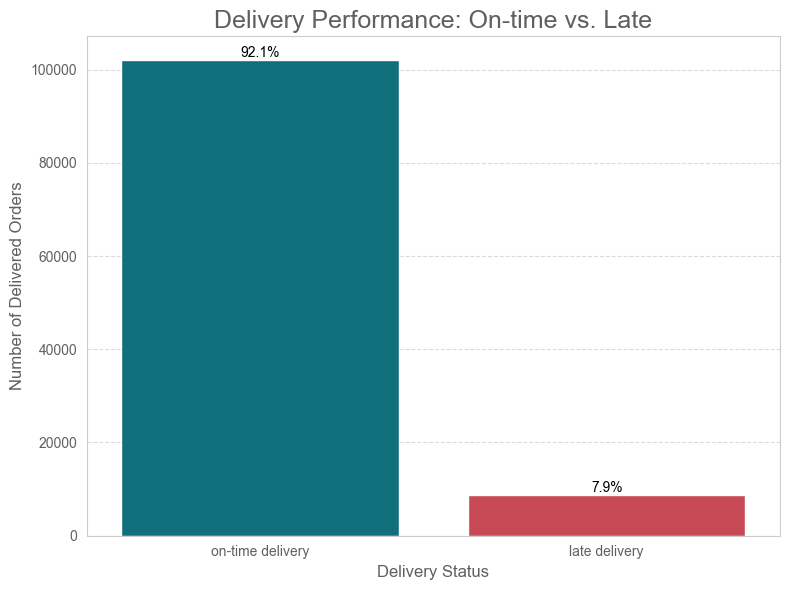


Delivery Performance Breakdown:


,delivery_status,count,percentage
0,on-time delivery,102077,92.100657
1,late delivery,8755,7.899343


In [58]:
# Cell 20: EDA - Delivery Performance (On-time vs. Late)

print("--- EDA: Delivery Performance (On-time vs. Late) ---")

# Focus on delivered orders for delivery performance analysis
delivered_orders = main_df[main_df['order_status'] == 'delivered'].copy()

# Count on-time vs. late deliveries
delivery_performance = delivered_orders['delivery_status'].value_counts().reset_index()
delivery_performance.columns = ['delivery_status', 'count']

# Filter to only include on-time and late deliveries for this specific plot
delivery_performance_filtered = delivery_performance[
    delivery_performance['delivery_status'].isin(['on-time delivery', 'late delivery'])
]

# Calculate percentages
delivery_performance_filtered['percentage'] = (
    delivery_performance_filtered['count'] / delivery_performance_filtered['count'].sum() * 100
)

# Set up the figure and axes
fig: Figure = Figure(figsize=(8, 6))
ax: Axes = fig.add_subplot(111)

# Define colors for on-time and late
delivery_colors = {
    'on-time delivery': primary_color, # Teal
    'late delivery': '#DC3545' # A strong red for late
}

sns.barplot(
    data=delivery_performance_filtered,
    x='delivery_status',
    y='count',
    palette=[delivery_colors[status] for status in delivery_performance_filtered['delivery_status']],
    ax=ax
)

ax.set_title('Delivery Performance: On-time vs. Late', fontsize=18, color=neutral_color)
ax.set_xlabel('Delivery Status', fontsize=12, color=neutral_color)
ax.set_ylabel('Number of Delivered Orders', fontsize=12, color=neutral_color)
ax.tick_params(axis='x', labelsize=10, colors=neutral_color)
ax.tick_params(axis='y', labelsize=10, colors=neutral_color)
ax.grid(axis='y', linestyle='--', alpha=0.7)
fig.tight_layout()

# Add percentage labels on top of bars
for index, row in delivery_performance_filtered.iterrows():
    ax.text(index, row['count'], f"{row['percentage']:.1f}%", color='black', ha="center", va='bottom', fontsize=10)

display(fig)
plt.show()

print("\nDelivery Performance Breakdown:")
display(delivery_performance_filtered)

# Cell 21: Markdown Cell for Delivery Performance Insight


http://googleusercontent.com/immersive_entry_chip/0

# Cell 22: Markdown Cell for Summary of Key Findings


http://googleusercontent.com/immersive_entry_chip/1

In [59]:
# Cell 22: Export Main DataFrame to CSV for Power BI

print("--- Exporting Main DataFrame to CSV ---")

# Define the path for the output CSV file
# It will be saved in the same folder as your raw data.
output_csv_path = os.path.join(data_folder_path, 'olist_ecommerce_master_data.csv')

# Export the DataFrame to CSV
# index=False prevents Pandas from writing the DataFrame index as a column in the CSV
# encoding='utf-8' is generally good for handling various characters (like Portuguese names)
main_df.to_csv(output_csv_path, index=False, encoding='utf-8')

print(f"\nMain DataFrame exported successfully to:\n{output_csv_path}")
print("You can now import this CSV into Power BI Desktop.")

--- Exporting Main DataFrame to CSV ---

Main DataFrame exported successfully to:
C:/Users/ilaib/OneDrive/Desktop/Data Science Projects/Brazillian e commerce datset\olist_ecommerce_master_data.csv
You can now import this CSV into Power BI Desktop.
